<img style="float: left;" src="earth-lab-logo-rgb.png" width="150" height="150" />

# Template: Earth Analytics Python 2020

Before submitting this assignment, be sure to restart the kernel and run all cells. To do this, pull down the Kernel drop down at the top of this notebook. Then select **restart and run all**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below.

* IMPORTANT: Before you submit your notebook, restart the kernel and run all! Your first cell in the notebook should be `[1]` and all cells should run in order! You will lose points if your notebook does not run. 

For all plots and code in general:

* Add appropriate titles to your plot that clearly and concisely describe what the plot shows (e.g. time, location, phenomenon).
* Be sure to use the correct bands for each plot.
* Specify the source of the data for each plot using a plot caption created with `ax.text()`.
* Place ONLY the code needed to create a plot in the plot cells. Place additional processing code ABOVE that cell (in a separate code cell).

Make sure that you:

* **Only include the package imports, code, data, and outputs that are CRUCIAL to your homework assignment.**
* Follow PEP 8 standards. Use the `pep8` tool in Jupyter Notebook to ensure proper formatting (however, note that it does not catch everything!).
* Keep comments concise and strategic. Don't comment every line!
* Organize your code in a way that makes it easy to follow. 
* Write your code so that it can be run on any operating system. This means that:
   1. the data should be downloaded in the notebook to ensure it's reproducible.
   2. all paths should be created dynamically using the os package to ensure that they work across operating systems. 
* Check for spelling errors in your text and code comments


In [1]:
NAME = "Anna Pavlenko"
COLLABORATORS = ""

![Colored Bar](colored-bar.png)

# - Automate NDVI Workflow

For this assignment, you will write code to generate a plot and an output CSV file of the mean normalized difference vegetation index (NDVI) for two different sites in the United States across one year of data:

* San Joaquin Experimental Range (SJER) in Southern California, United States
* Harvard Forest (HARV) in the Northeastern United States

The data that you will use for this week is available from **earthpy** using the following download: 

`et.data.get_data('ndvi-automation')`

## Assignment Goals

Your goal in this assignment is to create the most efficient and concise workflow that you can that allows for:

1. The code to scale if you added new sites or more time periods to the analysis.
2. Someone else to understand your workflow.
3. The LEAST and most efficient (i.e. runs fast) amount of code that completes the task.

### HINTS

* Remove values outside of the landsat valid range of values as specified in the metadata, as needed.
* Keep any output files SEPARATE FROM input files. Outputs should be created in an outputs directory that is created in the code (if needed) and/or tested for.
* It can help to create the plot and CSV first without cleaning the data to deal with cloud, so you can get a hang of the workflow.  Then, you can modify your workflow to include the cleaning of the data to deal with clouds. (There are tests throughout the notebook that can help you check the data!)


## Assignment Requirements

Your submission to the GitHub repository should include:
* This Jupyter Notebook file (.ipynb) with:
    * The code to create a plot of mean NDVI across the year:
        * NDVI on the x axis and formatted dates on the y for both NEON sites on one figure/axis object
    * The **data should be cleaned to remove the influence of clouds**. See the [earthdatascience website for an example of what your plot might look like with and without removal of clouds](https://www.earthdatascience.org/courses/earth-analytics-python/create-efficient-data-workflows/).
* One output .csv file that has 3 columns - NDVI, Date and Site Name - with values for SJER and HARV.

Your notebook should:
* Have at least 2 well documented and well named functions with docstrings.
* Include a Markdown cell at the top of the notebook that outlines the overall workflow using pseudocode (i.e. plain language, not code)
* Include additional Markdown cells throughout the notebook to describe: 
    * the data that you used - and where it is from
    * how data are being processing
    * how the code is optimized to run fast and be more concise

In [2]:
# Autograding imports - do not modify this cell
import matplotcheck.autograde as ag
import matplotcheck.notebook as nb
import matplotcheck.timeseries as ts
from datetime import datetime

In [3]:
# Import needed packages in PEP 8 order
import os
import seaborn as sns
from glob import glob

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors

import numpy as np
import numpy.ma as ma

from shapely.geometry import box
import pandas as pd
from pandas import DataFrame

import geopandas as gpd
import rasterio as rio
from rasterio.plot import plotting_extent 
from rasterio.mask import mask

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import earthpy.mask as em

# Setting consistent plotting style throughout notebook
sns.set_style("white")
sns.set(font_scale=1.5)

# Download data& set working directory
et.data.get_data('ndvi-automation')
os.chdir(os.path.join(et.io.HOME, "earth-analytics"))

### DO NOT REMOVE THIS LINE ###
start_time = datetime.now()

# Figure 1: Plot 1 - Mean NDVI For Each Site Across the Year (50 points)

Create a plot of the mean normalized difference vegetation index (NDVI) for the two different sites in the United States across the year: 

* NDVI on the x axis and formatted dates on the y for both NEON sites on one figure/axis object.
* Each site should be identified with a different color in the plot and legend.
* The final plot **data should be cleaned to remove the influence of clouds**.
* Be sure to include appropriate title and axes labels.

You may additional cells as needed for processing data (e.g. defining functions, etc), but be sure to:
* follow the instructions in the code cells that have been provided to ensure that you are able to use the sanity check tests that are provided. 
* include only the plot code in the cell identified for the final plot code below

# The workflow to calculate Mean NDVI For Each Site Across the Year.
### 1 Scene:
 1. Open bands needed for NDVI: Red -5 and InfraRed -4
    * go into each scene directory and open/crop bands 4 and 5 (i.e. index 3 and 4);
    * NaN pixels;
    * apply QA to remove clouds.
 2. Calculating NDVI for 1 scene (scene - particular location).
    * numpy array that contains all NDVI values for all pixels.
 3. Calculate mean NDVI value for the scene - 1 value. 
    * store in Mean NDVI column.
 4. Parse the Site Name -- > from directory path.
 5. Parse the  Individual band Name / Date   -- > from directory path:
    * add items to a list and them convert that list to pandas DF
    * add items to individual lists and then concatenate the lists to create the pandas DF by converting each list into a column with the pandas DF.


 Create dataframe of NDVI without cleaning data to deal with clouds


## Multiple Scenes for one site:
* Loop across 1 Site for 23 Scenes -- > list with 23 numbers

## Multiple Sites
* Loop for 2 Sites directory (SJER and HARV) to get a 2 list of 23 numbers.
* Save as csv file.
* Plot the csv files on 1 gragh. 

##  Create panda Data Frames of Mean Uncleaned NDVI for each Site(SJER, HARV) 

### Important: to use the ungraded tests below as a sanity check, 
### name your dataframe 'ndvi_ts_unclean' and the columns: mean_ndvi and site

In [14]:
# UNCLEAR DATAFRAME:

# I. Open the boundary shpfiles for each site
### 1.1.Open shp file for JER site:
boundary1 = os.path.join("data", "ndvi-automation", "sites", 
                          "SJER", "vector","SJER-crop.shp")
### Read shp file:
bound1 = gpd.read_file(boundary1)
### Open shp file for HAV site:
boundary2 = os.path.join("data", "ndvi-automation", "sites", 
                         "HARV", "vector","HARV-crop.shp")
### Read shp file:
bound2 = gpd.read_file(boundary2)

# 1.2 Multiple Sites JERS and HARV:
another_path = os.path.join("data", "ndvi-automation", "sites")
all_sites = glob(os.path.join(another_path, "*/"))
land_dir = "landsat-crop"

# 1.3. Creating a list of Sites Names:
sites_name = []
# Creating a list of NDVI's for each Scenes
scene_ndvi_j = []
scene_ndvi_h = []

# 1.4. Create a loop to calculate Mean Uncleaned NDVI for each Site(SJER, HARV): 
for site_dir in all_sites:  
    new_path = os.path.join(site_dir + land_dir)
    
    # For SJER Site:
    if "SJER" in site_dir:        
        site_scenes = glob(os.path.join(new_path, "*/"))
        site_name = "SJER"
        print("SJER")
         
        for scene in site_scenes: 
            # View directory name and excract DATE for particular scene
            dir_name = os.path.basename(os.path.normpath(scene))
            
            # Get landsat date from directory name
            date = dir_name[10:18] 
            
            range_bands = sorted(glob(os.path.join(scene, '*band[4-5].tif*')))
             
            landsat_cl_path = glob(os.path.join(scene, '*_pixel_qa.tif'))
            
            # I. Open & read and crop the pixel_qa layer for scene
            for qa_band in landsat_cl_path:
                with rio.open(qa_band) as qa_scr:    
                    qa_mask, qa_mask_meta = es.crop_image(qa_scr, bound1)
                               
            # II. Open & read and crop the bands for scene
            for band_path in range_bands:
                
                # open raster as numpy array by rater.io in content manager(open/close file)
                 with rio.open(band_path) as band_src:                    
                    if "band4" in band_path:           
                   
                        ## Use crop.image() to read and crop (Crop these bands by boundary shpfile)
                        band_4, band_4_meta = es.crop_image(band_src, bound1)
                    
                        # Create a mask of all values outside of the valid range of values
                        mask = (band_4 < 0) | (band_4 > 10000)

                        # Apply the mask to the array which will remove those pixels from any calculated values
                        band_4_no_data = ma.masked_array(band_4, mask)

                    else:
                        ## Use crop.image() to read and crop
                        band_5, band_5_meta = es.crop_image(band_src, bound1)
                        
                        # Create a mask of all values outside of the valid range of values
                        mask = (band_5 < 0) | (band_5 > 10000)

                        # Apply the mask to the array which will remove those pixels from any calculated values
                        band_5_no_data = ma.masked_array(band_5, mask)
             
            # III. Calculation mean NDVI for SJER site
            mean_ndvi = es.normalized_diff(band_5_no_data, band_4_no_data).mean()
            scene_ndvi_j.append([site_name, date, mean_ndvi]) 
                     
            #IV. Creating a dataframe object from list of tuples
            ndvi_sjer_unclean = pd.DataFrame(scene_ndvi_j)

      # For HARV Site:   
    else:
        print("HARV")
        site_scenes = glob(os.path.join(new_path, "*/"))
        site_name = "HARV"
        print("HARV")
         
        for scene in site_scenes: 
            # View directory name and excract DATE for particular scene
            dir_name = os.path.basename(os.path.normpath(scene))
            
            # Get landsat date from directory name
            date = dir_name[10:18] 
            
            range_bands = sorted(glob(os.path.join(scene, '*band[4-5].tif*')))
             
            landsat_cl_path = glob(os.path.join(scene, '*_pixel_qa.tif'))
            
            # I. Open & read and crop the pixel_qa layer for scene
            for qa_band in landsat_cl_path:
                with rio.open(qa_band) as qa_scr:    
                    qa_mask, qa_mask_meta = es.crop_image(qa_scr, bound2)
                               
            # II. Open & read and crop the bands for scene
            for band_path in range_bands:
                
                # open raster as numpy array by rater.io in content manager(open/close file)
                 with rio.open(band_path) as band_src:                    
                    if "band4" in band_path:           
                   
                        ## Use crop.image() to read and crop (Crop these bands by boundary shpfile)
                        band_4, band_4_meta = es.crop_image(band_src, bound2)
                    
                        # Create a mask of all values outside of the valid range of values
                        mask = (band_4 < 0) | (band_4 > 10000)

                        # Apply the mask to the array which will remove those pixels from any calculated values
                        band_4_no_data = ma.masked_array(band_4, mask)

                    else:
                        ## Use crop.image() to read and crop
                        band_5, band_5_meta = es.crop_image(band_src, bound2)
                        
                        # Create a mask of all values outside of the valid range of values
                        mask = (band_5 < 0) | (band_5 > 10000)

                        # Apply the mask to the array which will remove those pixels from any calculated values
                        band_5_no_data = ma.masked_array(band_5, mask)
             
            # III. Calculation mean NDVI for SJER site
            mean_ndvi = es.normalized_diff(band_5_no_data, band_4_no_data).mean()
            scene_ndvi_h.append([site_name, date, mean_ndvi]) 
                     
            #IV. Creating a dataframe object from list of tuples
            ndvi_harv_unclean = pd.DataFrame(scene_ndvi_h)

# 1.5. Renaming columns in DF
ndvi_sjer_unclean.columns = ['Site', 'Data', 'Mean_NDVI']
ndvi_harv_unclean.columns = ['Site', 'Data', 'Mean_NDVI']

SJER
HARV
HARV


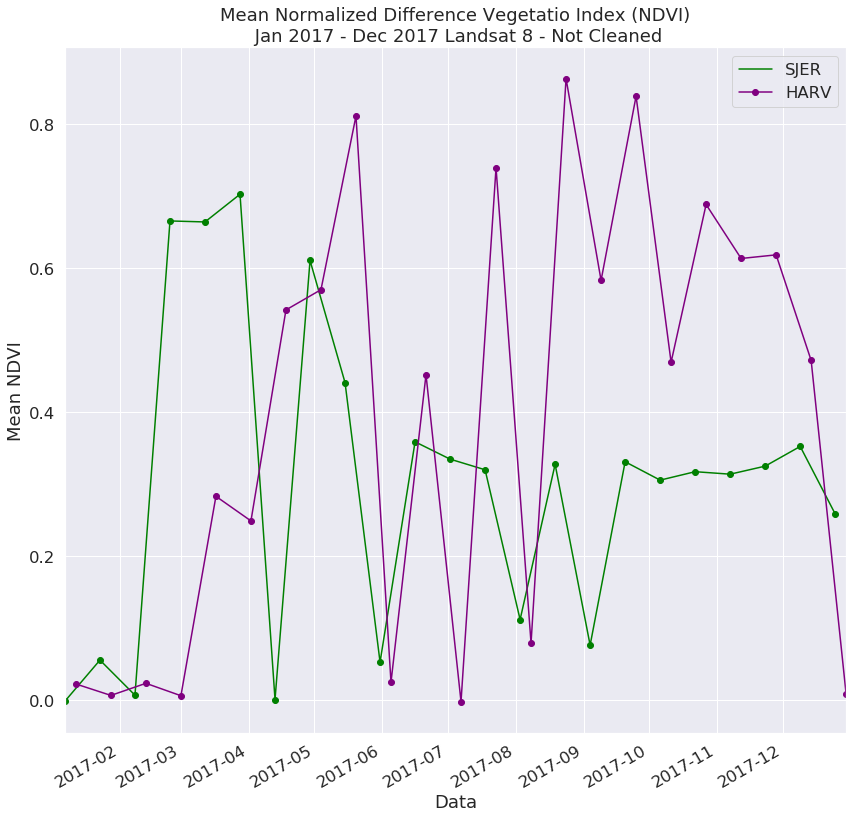

In [15]:
# Plotting the data
# Creating Data column in data format

ndvi_sjer_unclean['Data'] = ndvi_sjer_unclean['Data'].astype('datetime64[ns]') 

ndvi_harv_unclean['Data'] = ndvi_harv_unclean['Data'].astype('datetime64[ns]') 

fig, ax = plt.subplots(figsize=(14, 14))

ax.set(xlabel="Month",
       ylabel="Mean NDVI",
       title='Mean Normalized Difference Vegetatio Index (NDVI)\n Jan 2017 - Dec 2017 Landsat 8 - Not Cleaned')

ndvi_sjer_unclean.plot(ax=ax, x ='Data', y='Mean_NDVI',  marker='o', color = 'green', label='SJER')

ndvi_harv_unclean.plot(ax=ax, x ='Data', y='Mean_NDVI', marker='o', color = 'purple', label='HARV')

plt.show()

In [16]:
# Creating CLEAR DATAFRAME:

# 1.1. Creating a list of Sites Names:
sites_name = []

#  1.2 Create a list of values that you want to set as "mask" in the pixel qa layer   
high_cloud_confidence = em.pixel_flags["pixel_qa"]["L8"]["High Cloud Confidence"]
cloud = em.pixel_flags["pixel_qa"]["L8"]["Cloud"]
cloud_shadow = em.pixel_flags["pixel_qa"]["L8"]["Cloud Shadow"]

all_masked_values = cloud_shadow + cloud + high_cloud_confidence

# 1.3.  Creating a list of NDVI's for each Scenes
scene_ndvi_j_clear = []
scene_ndvi_h_clear = []

# 1.4. Create a loop to calculate Mean Uncleaned NDVI for each Site(SJER, HARV): 
for site_dir in all_sites:  
    new_path = os.path.join(site_dir + land_dir)
    
    # For SJER Site:
    if "SJER" in site_dir:        
        site_scenes = glob(os.path.join(new_path, "*/"))
        site_name = "SJER"
        print("SJER")
         
        for scene in site_scenes: 
            # View directory name and excract DATE for particular scene
            dir_name = os.path.basename(os.path.normpath(scene))
            
            # Get landsat date from directory name
            date = dir_name[10:18] 
            
            range_bands = sorted(glob(os.path.join(scene, '*band[4-5].tif*')))
             
            landsat_cl_path = glob(os.path.join(scene, '*_pixel_qa.tif'))
            
            # I. Open & read and crop the pixel_qa layer for scene
            for qa_band in landsat_cl_path:
                with rio.open(qa_band) as qa_scr:    
                    qa_mask, qa_mask_meta = es.crop_image(qa_scr, bound1)
                               
            # II. Open & read and crop the bands for scene
            for band_path in range_bands:
                
                # open raster as numpy array by rater.io in content manager(open/close file)
                 with rio.open(band_path) as band_src:                    
                    if "band4" in band_path:           
                   
                        ## Use crop.image() to read and crop (Crop these bands by boundary shpfile)
                        band_4, band_4_meta = es.crop_image(band_src, bound1)
                    
                        # Create a mask of all values outside of the valid range of values
                        mask = (band_4 < 0) | (band_4 > 10000)

                        # Apply the mask to the array which will remove those pixels from any calculated values
                        band_4_no_data = ma.masked_array(band_4, mask)
                        
                        # Clear data for clouds coverage                                 
                        band_4_no_data = ma.masked_array(band_4, mask)

                       
                    else:
                        ## Use crop.image() to read and crop
                        band_5, band_5_meta = es.crop_image(band_src, bound1)
                        
                        # Create a mask of all values outside of the valid range of values
                        mask = (band_5 < 0) | (band_5 > 10000)

                        # Apply the mask to the array which will remove those pixels from any calculated values
                        band_5_no_data = ma.masked_array(band_5, mask)

                        # Clear data for clouds coverage                                
                        band_5_no_data = ma.masked_array(band_5, mask)
                                             
                        
            # III. Calculation mean NDVI for SJER site
            mean_ndvi = es.normalized_diff(band5_cl_free, band4_cl_free).mean()
            scene_ndvi_j_clear.append([site_name, date, mean_ndvi]) 
                     
            #IV. Creating a dataframe object from list of tuples
            ndvi_sjer_clean = pd.DataFrame(scene_ndvi_j_clear)

      # For HARV Site:   
    else:
        print("HARV")
        site_scenes = glob(os.path.join(new_path, "*/"))
        site_name = "HARV"
        print("HARV")
         
        for scene in site_scenes: 
            # View directory name and excract DATE for particular scene
            dir_name = os.path.basename(os.path.normpath(scene))
            
            # Get landsat date from directory name
            date = dir_name[10:18] 
            
            range_bands = sorted(glob(os.path.join(scene, '*band[4-5].tif*')))
             
            landsat_cl_path = glob(os.path.join(scene, '*_pixel_qa.tif'))
            
            # I. Open & read and crop the pixel_qa layer for scene
            for qa_band in landsat_cl_path:
                with rio.open(qa_band) as qa_scr:    
                    qa_mask, qa_mask_meta = es.crop_image(qa_scr, bound2)
                               
            # II. Open & read and crop the bands for scene
            for band_path in range_bands:
                
                # open raster as numpy array by rater.io in content manager(open/close file)
                 with rio.open(band_path) as band_src:                    
                    if "band4" in band_path:           
                   
                        ## Use crop.image() to read and crop (Crop these bands by boundary shpfile)
                        band_4, band_4_meta = es.crop_image(band_src, bound2)
                    
                        # Create a mask of all values outside of the valid range of values
                        mask = (band_4 < 0) | (band_4 > 10000)

                        # Apply the mask to the array which will remove those pixels from any calculated values
                        band_4_no_data = ma.masked_array(band_4, mask)

                        # Clear data for clouds coverage                                 
                        if all_masked_values in qa_mask:
                            band4_cl_free = em.mask_pixels(band_4_no_data, mask_arr = qa_mask, 
                                                           vals = all_masked_values)
                        else:
                            band4_cl_free = band_4_no_data                     
                        
                    else:
                        ## Use crop.image() to read and crop
                        band_5, band_5_meta = es.crop_image(band_src, bound2)
                        
                        # Create a mask of all values outside of the valid range of values
                        mask = (band_5 < 0) | (band_5 > 10000)

                        # Apply the mask to the array which will remove those pixels from any calculated values
                        band_5_no_data = ma.masked_array(band_5, mask)

                        # Clear data for clouds coverage                                 
                        if all_masked_values in qa_mask:
                            band5_cl_free = em.mask_pixels(band_5_no_data, mask_arr = qa_mask, 
                                                           vals = all_masked_values)
                        else:
                            band5_cl_free = band_5_no_data
                            
            # III. Calculation mean NDVI for SJER site
            mean_ndvi = es.normalized_diff(band5_cl_free, band4_cl_free).mean()
            scene_ndvi_h_clear.append([site_name, date, mean_ndvi]) 
                     
            #IV. Creating a dataframe object from list of tuples
            ndvi_harv_clean = pd.DataFrame(scene_ndvi_h_clear)
   

SJER
HARV
HARV


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:124: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:141: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


In [7]:
               # def ndvi_calc (band_path, bound, qa_mask, all_masked_values)

# Create Clear dataframe 'ndvi_ts_clean' and the columns: mean_ndvi and site

In [8]:
# Creating CLEAR DATAFRAME:

def clean_ndvi(band_no_data, qa_mask, all_masked_values):
    try:
        band_cl_free = em.mask_pixels(band_no_data, mask_arr = qa_mask, 
                                   vals = all_masked_values)
    except:
        band_cl_free = band_no_data 
    
    return band_cl_free

# 1.1. Creating a list of Sites Names:
sites_name = []

#  1.2 Create a list of values that you want to set as "mask" in the pixel qa layer   
high_cloud_confidence = em.pixel_flags["pixel_qa"]["L8"]["High Cloud Confidence"]
cloud = em.pixel_flags["pixel_qa"]["L8"]["Cloud"]
cloud_shadow = em.pixel_flags["pixel_qa"]["L8"]["Cloud Shadow"]

all_masked_values = cloud_shadow + cloud + high_cloud_confidence

# 1.3.  Creating a list of NDVI's for each Scenes
scene_ndvi_j_clear = []
scene_ndvi_h_clear = []

# 1.4. Create a loop to calculate Mean Uncleaned NDVI for each Site(SJER, HARV): 
for site_dir in all_sites:  
    new_path = os.path.join(site_dir + land_dir)
    
    # For SJER Site:
    if "SJER" in site_dir:        
        site_scenes = glob(os.path.join(new_path, "*/"))
        site_name = "SJER"
        print("SJER")
         
        for scene in site_scenes: 
            # View directory name and excract DATE for particular scene
            dir_name = os.path.basename(os.path.normpath(scene))
            
            # Get landsat date from directory name
            date = dir_name[10:18] 
            
            range_bands = sorted(glob(os.path.join(scene, '*band[4-5].tif*')))
             
            landsat_cl_path = glob(os.path.join(scene, '*_pixel_qa.tif'))
            
            # I. Open & read and crop the pixel_qa layer for scene
            for qa_band in landsat_cl_path:
                with rio.open(qa_band) as qa_scr:    
                    qa_mask, qa_mask_meta = es.crop_image(qa_scr, bound1)
                               
            # II. Open & read and crop the bands for scene
            for band_path in range_bands:
                
                # open raster as numpy array by rater.io in content manager(open/close file)
                 with rio.open(band_path) as band_src:                    
                    if "band4" in band_path:           
                   
                        ## Use crop.image() to read and crop (Crop these bands by boundary shpfile)
                        band_4, band_4_meta = es.crop_image(band_src, bound1)
                    
                        # Create a mask of all values outside of the valid range of values
                        mask = (band_4 < 0) | (band_4 > 10000)

                        # Apply the mask to the array which will remove those pixels from any calculated values
                        band_4_no_data = ma.masked_array(band_4, mask)
                        
                        # Clear data for clouds coverage                                 
                        clean_ndvi(band_4_no_data, qa_mask, all_masked_values)

                       
                    else:
                        ## Use crop.image() to read and crop
                        band_5, band_5_meta = es.crop_image(band_src, bound1)
                        
                        # Create a mask of all values outside of the valid range of values
                        mask = (band_5 < 0) | (band_5 > 10000)

                        # Apply the mask to the array which will remove those pixels from any calculated values
                        band_5_no_data = ma.masked_array(band_5, mask)

                        # Clear data for clouds coverage                                
                        clean_ndvi(band_5_no_data, qa_mask, all_masked_values)
                                             
                        
            # III. Calculation mean NDVI for SJER site
            mean_ndvi = es.normalized_diff(band5_cl_free, band4_cl_free).mean()
            scene_ndvi_j_clear.append([site_name, date, mean_ndvi]) 
                     
            #IV. Creating a dataframe object from list of tuples
            ndvi_sjer_clean = pd.DataFrame(scene_ndvi_j_clear)

      # For HARV Site:   
    else:
        print("HARV")
        site_scenes = glob(os.path.join(new_path, "*/"))
        site_name = "HARV"
        print("HARV")
         
        for scene in site_scenes: 
            # View directory name and excract DATE for particular scene
            dir_name = os.path.basename(os.path.normpath(scene))
            
            # Get landsat date from directory name
            date = dir_name[10:18] 
            
            range_bands = sorted(glob(os.path.join(scene, '*band[4-5].tif*')))
             
            landsat_cl_path = glob(os.path.join(scene, '*_pixel_qa.tif'))
            
            # I. Open & read and crop the pixel_qa layer for scene
            for qa_band in landsat_cl_path:
                with rio.open(qa_band) as qa_scr:    
                    qa_mask, qa_mask_meta = es.crop_image(qa_scr, bound2)
                               
            # II. Open & read and crop the bands for scene
            for band_path in range_bands:
                
                # open raster as numpy array by rater.io in content manager(open/close file)
                 with rio.open(band_path) as band_src:                    
                    if "band4" in band_path:           
                   
                        ## Use crop.image() to read and crop (Crop these bands by boundary shpfile)
                        band_4, band_4_meta = es.crop_image(band_src, bound2)
                    
                        # Create a mask of all values outside of the valid range of values
                        mask = (band_4 < 0) | (band_4 > 10000)

                        # Apply the mask to the array which will remove those pixels from any calculated values
                        band_4_no_data = ma.masked_array(band_4, mask)

                        # Clear data for clouds coverage                                 
                        clean_ndvi(band_4_no_data, qa_mask, all_masked_values)                     
                        
                    else:
                        ## Use crop.image() to read and crop
                        band_5, band_5_meta = es.crop_image(band_src, bound2)
                        
                        # Create a mask of all values outside of the valid range of values
                        mask = (band_5 < 0) | (band_5 > 10000)

                        # Apply the mask to the array which will remove those pixels from any calculated values
                        band_5_no_data = ma.masked_array(band_5, mask)

                        # Clear data for clouds coverage                                 
                        clean_ndvi(band_5_no_data, qa_mask, all_masked_values)
                            
            # III. Calculation mean NDVI for SJER site
            mean_ndvi = es.normalized_diff(band5_cl_free, band4_cl_free).mean()
            scene_ndvi_h_clear.append([site_name, date, mean_ndvi]) 
                     
            #IV. Creating a dataframe object from list of tuples
            ndvi_harv_clean = pd.DataFrame(scene_ndvi_h_clear)
            
 # Renaming columns in DF:
ndvi_sjer_clean.columns = ['Site', 'Data', 'Mean_NDVI']

ndvi_harv_clean.columns = ['Site', 'Data', 'Mean_NDVI']

SJER
HARV
HARV


In [11]:
ndvi_sjer_clean

,Site,Data,Mean_NDVI
0,SJER,20171022,0.024826
1,SJER,20171107,0.024826
2,SJER,20170803,0.024826
3,SJER,20170123,0.024826
4,SJER,20170920,0.024826
5,SJER,20170224,0.024826
6,SJER,20170312,0.024826
7,SJER,20170819,0.024826
8,SJER,20170107,0.024826
9,SJER,20170702,0.024826


In [9]:
# Test your dataframe before cleaning the data to deal with clouds. 
# Ensure that your dataframe is named 'ndvi_ts_unclean'
# and that the columns called: mean_ndvi and site

# These tests are not graded.
# This is for data that hasn't been cleaned yet to deal 
# with clouds and serves as a half way sanity check.

# Ensure the data is stored in a dataframe.
try:
    assert isinstance(ndvi_ts_unclean, pd.DataFrame)
    print('Your data is stored in a DataFrame!')
except AssertionError:
    print('It appears your data is not stored in a DataFrame. ',
          'To see what type of object your data is stored in, check its type with type(object)')

# Ensure there are the correct amount of total entries in the dataframe.
try:
    assert len(ndvi_ts_unclean) == 46
    print('You have the correct number of data values!')
except AssertionError:
    print('You do not have the correct amount of data stored in your DataFrame.')

# Ensure there are the correct amount of entries for each site.
try:
    assert all(
        [site_count == 23 for site_count in ndvi_ts_unclean['site'].value_counts()])
    print('You have the correct amount of both sites!')
except AssertionError:
    print('One of your sites is either missing data or has extra data.')

# Ensure the minimum and maximum values in the mean_ndvi column are correct.
try:
    ndvi_min, ndvi_max = ndvi_ts_unclean['mean_ndvi'].min(), ndvi_ts_unclean['mean_ndvi'].max()
    assert ndvi_min == -0.0020918187219649553 and ndvi_max == 0.8629496097564697
    print('The minimum and maximum values in your ndvi_mean column are correct!')
except AssertionError:
    print('The minimum and maximum values in your ndvi_mean column are incorrect.')

NameError: name 'ndvi_ts_unclean' is not defined

In [12]:
# Create dataframe of NDVI including the cleaning data to deal with clouds
ndvi_sjer_clean.columns = ['Site', 'Data', 'Mean_NDVI']
ndvi_sjer_clean

ndvi_harv_clean.columns = ['Site', 'Data', 'Mean_NDVI']
ndvi_harv_clean

# Important: to use the ungraded tests below as a sanity check, 
# name your dataframe 'ndvi_ts' and the columns: mean_ndvi and site

ndvi_sjer_clean
ndvi_sjer_clean['Data'] = ndvi_sjer_clean['Data'].astype('datetime64[ns]') 
ndvi_sjer_clean['Data']


ndvi_harv_clean
ndvi_harv_clean['Data'] = ndvi_harv_clean['Data'].astype('datetime64[ns]') 


print(ndvi_harv_clean['Mean_NDVI'])
#.dropna(how='any', subset=['Name', 'Age'])
#ndvi_harv_clean=ndvi_harv_clean['Mean_NDVI'].dropna('--', axis=0)
#ndvi_harv_clean = ndvi_harv_clean.dropna()
#ndvi_harv_clean['Mean_NDVI'] = ndvi_harv_clean['Mean_NDVI'].replace(ndvi_harv_clean['Mean_NDVI'] == '--', None)
#ndvi_harv_clean.dropna()

#ndvi_harv_clean['Mean_NDVI']

0     0.024826
1     0.024826
2     0.024826
3     0.024826
4     0.024826
5     0.024826
6     0.024826
7     0.024826
8     0.024826
9     0.024826
10    0.024826
11    0.024826
12    0.024826
13    0.024826
14    0.024826
15    0.024826
16    0.024826
17    0.024826
18    0.024826
19    0.024826
20    0.024826
21    0.024826
22    0.024826
Name: Mean_NDVI, dtype: float64


In [ ]:
# Last sanity check before creating your plot

# Ensure that your dataframe is named 'ndvi_ts'
# and that the columns called: mean_ndvi and site

# These tests are not graded.

# Ensure the data is stored in a dataframe.
try:
    assert isinstance(ndvi_df, pd.DataFrame)
    print('Your data is stored in a DataFrame!')
except AssertionError:
    print('It appears your data is not stored in a DataFrame. ',
          'To see what type of object your data is stored in, check its type with type(object)')

# Check that dataframe contains the appropriate number of NAN values
try:
    assert ndvi_df.isna().sum()['mean_ndvi'] == 15
    print('Correct number of masked data values!')
except AssertionError:
    print('The amount of null data in your dataframe is incorrect.')

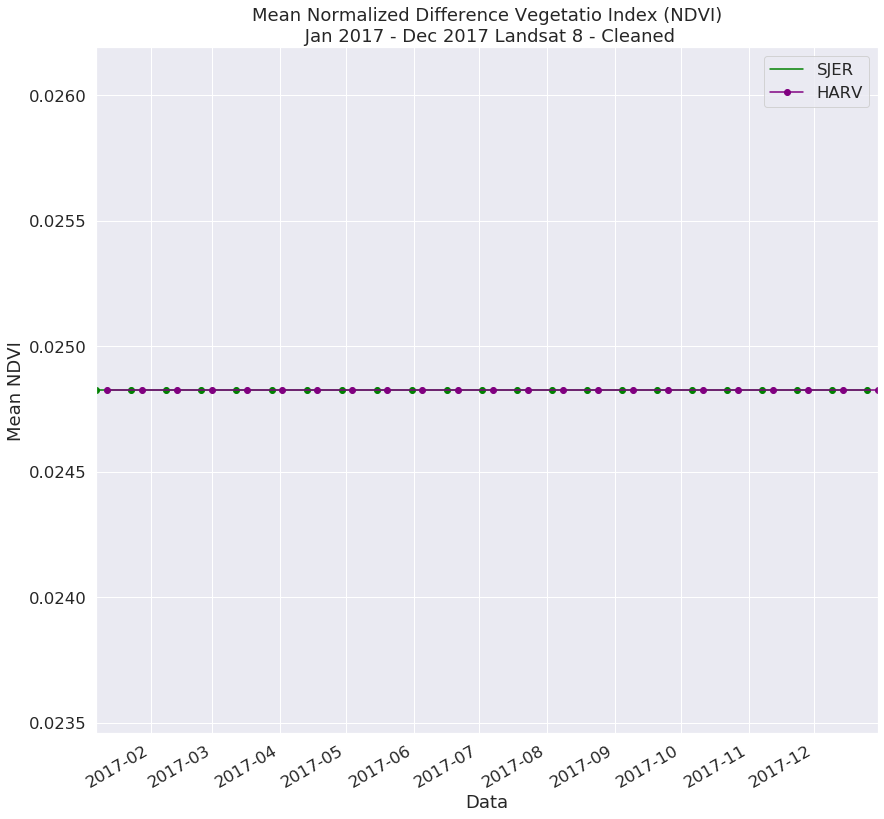

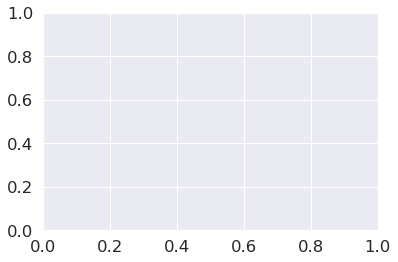

In [13]:
# This is the final figure of mean NDVI 
# for both sites across the year  with data cleaned to deal with clouds

fig, ax = plt.subplots(figsize=(14, 14))

ax.set(xlabel="Month",
       ylabel="Mean NDVI",
       title='Mean Normalized Difference Vegetatio Index (NDVI)\n Jan 2017 - Dec 2017 Landsat 8 - Cleaned')

ndvi_sjer_clean.plot(ax=ax, x ='Data', y='Mean_NDVI',  marker='o', color = 'green', label='SJER')

ndvi_harv_clean.plot(ax=ax, x ='Data', y='Mean_NDVI', marker='o', color = 'purple', label='HARV')

plt.show()

### DO NOT REMOVE LINES BELOW ###
final_masked_solution = nb.convert_axes(plt, which_axes="current")
end_time = datetime.now()
total_time = end_time - start_time

In [ ]:
# Ignore this cell for the autograding tests


# Question 1 (10 points)

Imagine that you are planning NEON’s upcoming flight season to capture remote sensing data in these locations and want to ensure that you fly the area when the vegetation is the most green.

When would you recommend the flights take place for each site? 

Answer the question in 2-3 sentences in the Markdown cell below.

To ensure that you fly the area when the vegetation is the most green:
- for HARV site nd of May till October;
- for SJER end of February to May.

# Question 2 (10 points)

How could you modify your workflow to look at vegetation changes over time in each site? 

Answer the question in 2-3 sentences in the Markdown cell below.

I will modify workflow to look at vegetation changes over time in each site To make focus 
for HARV site nd of May till October;
for SJER end of February to May.

just to choose specific scenes.

# Do not edit this cell! (40 points)

The notebook includes:
* at least 2 well documented and well named functions with appropriately formatted docstrings.

# Do not edit this cell! (20 points)

The notebook includes:
* a Markdown cell at the top of the notebook that outlines the overall workflow using pseudocode (i.e. plain language, not code).

# Do not edit this cell! (20 points)

The notebook includes:
* additional Markdown cells throughout the notebook to describe: 
    * the data that you used - and where it is from
    * how data are being processing
    * how the code is optimized to run fast and be more concise

# Do not edit this cell! (20 points)

The notebook will also be checked for overall clean code requirements as specified at the **top** of this notebook. Some of these requirements include (review the top cells for more specifics): 

* Notebook begins at cell [1] and runs on any machine in its entirety.
* PEP 8 format is applied throughout (including lengths of comment and code lines).
* No additional code or imports in the notebook that is not needed for the workflow.
* Notebook is fully reproducible. This means:
   * reproducible paths using the os module.
   * data downloaded using code in the notebook.
   * all imports at top of notebook.

# Do not edit this cell! (20 points)

In addition to this notebook, the submission to the GitHub repository includes:
* One output .csv file that has 3 columns - NDVI, Date and Site Name - with values for SJER and HARV